In [3]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

In [4]:
maxiter = 20000

def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5)
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [5]:
data, data_out = dt._get_cup('train')
test_split = 0.2
test_len = int(len(data)*test_split)
test, test_out = data[:test_len, :], data_out[:test_len, :]
test_out1, test_out2 = test_out[:, 0], test_out[:, 1]
dev_set, dev_out = data[test_len:, :], data_out[test_len:, :]
dev_out1, dev_out2 = dev_out[:, 0], dev_out[:, 1]

In [4]:
# Values:
#     eps: 1e-1, 1e-2, 5e-3
#     alpha: 0.3 0.5 0.7

# EPS = 1e-1

In [5]:
eps = 1e-1

## LINEAR

Training first model ... 


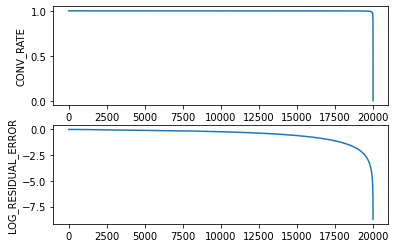

Fit time: 566.7968018054962, #SV: 1123
SUM OF eps-LOSS: 21940.058027077026
DEVSET MEE: 3.4742485519664115


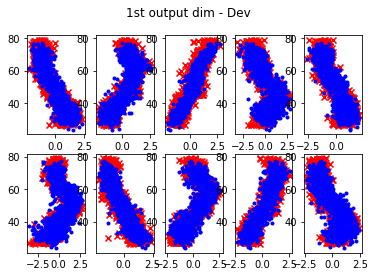

Testing the model
SUM OF eps-LOSS: 5790.622099267123
TEST MEE: 3.5985105303796594


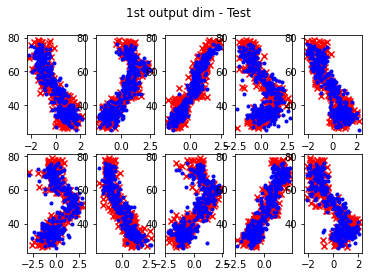

In [6]:
cup_model = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


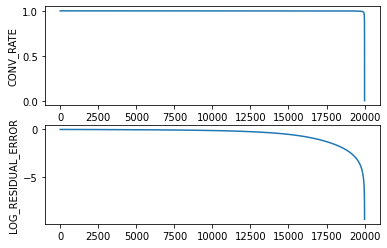

Fit time: 619.5339157581329, #SV: 1212
SUM OF eps-LOSS: 22011.463212895174
DEVSET MEE: 3.4660637527202547


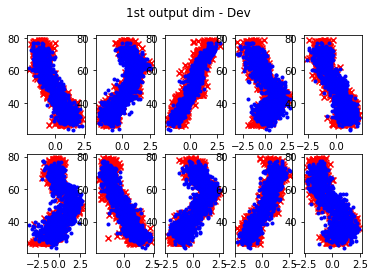

Testing the model
SUM OF eps-LOSS: 5722.533738178324
TEST MEE: 3.5509754259738635


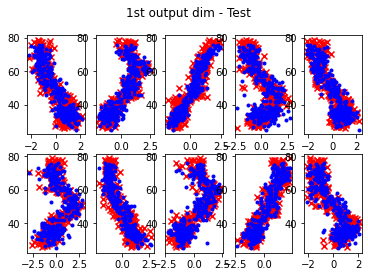

In [7]:
cup_model1 = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


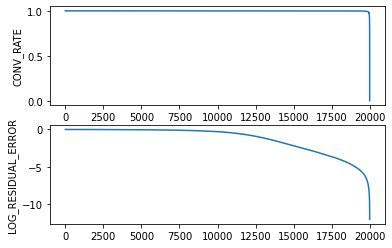

Fit time: 668.2906477451324, #SV: 1219
SUM OF eps-LOSS: 21990.815400941963
DEVSET MEE: 3.463592232654235


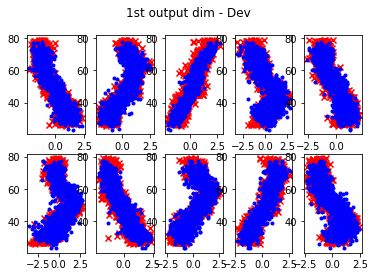

Testing the model
SUM OF eps-LOSS: 5738.372387015352
TEST MEE: 3.5540532226117048


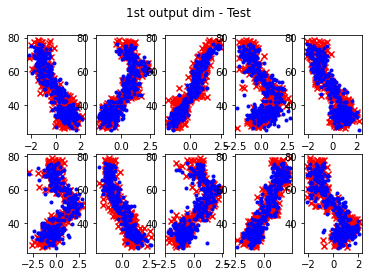

In [8]:
cup_model2 = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [9]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

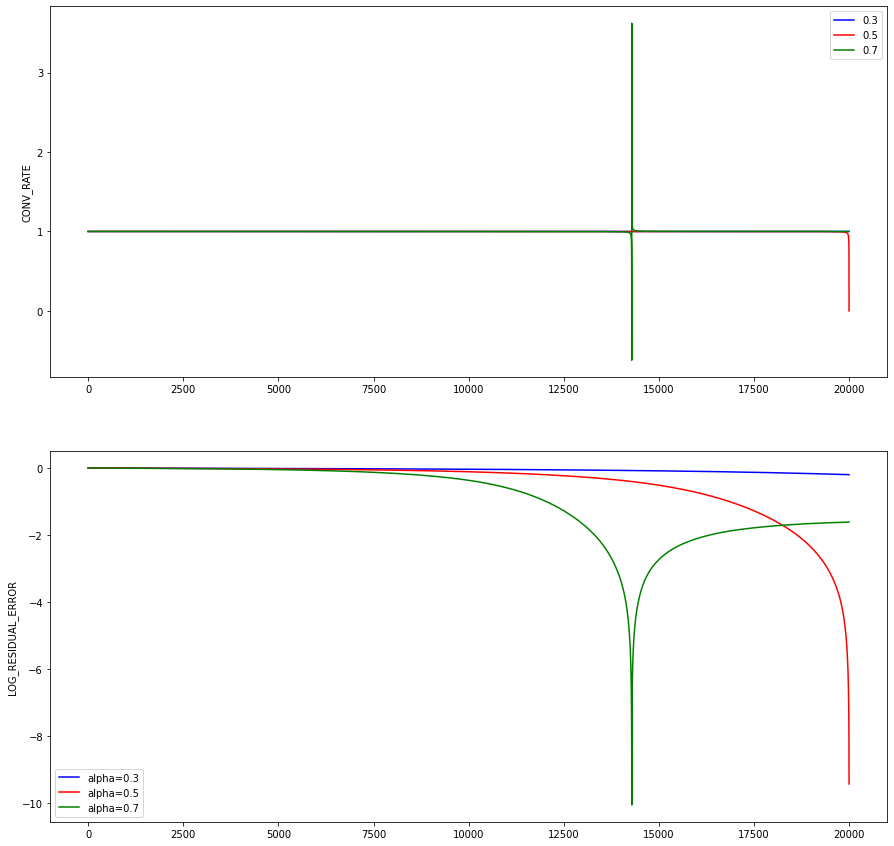

In [10]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

lin_01_0, lin_01_1, lin_01_2 = cup_model, cup_model1, cup_model2

In [11]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-461.14441953764623, -2560.684454168356, -3071.3413810040447)

## POLY

Training first model ... 


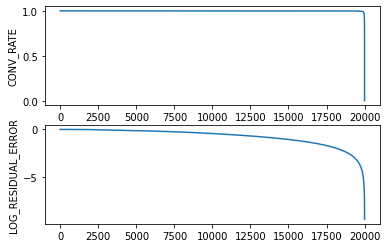

Fit time: 759.361741065979, #SV: 1219
SUM OF eps-LOSS: 7335.497090590014
DEVSET MEE: 1.9622567225000467


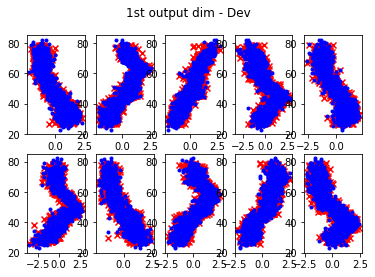

Testing the model
SUM OF eps-LOSS: 2139.4805052381057
TEST MEE: 2.108150440792825


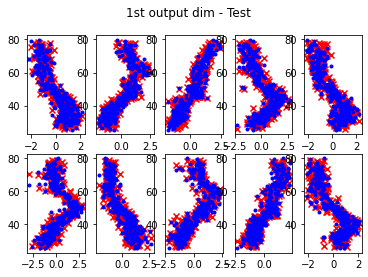

In [12]:
cup_model = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


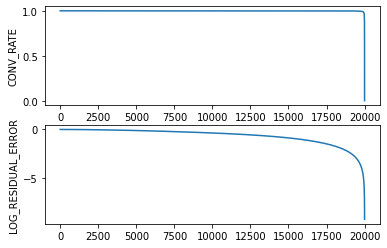

Fit time: 731.8776450157166, #SV: 1220
SUM OF eps-LOSS: 6319.613013997793
DEVSET MEE: 1.8296931443405344


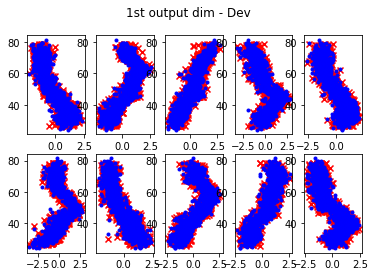

Testing the model
SUM OF eps-LOSS: 2130.0415538608254
TEST MEE: 2.0987658083746434


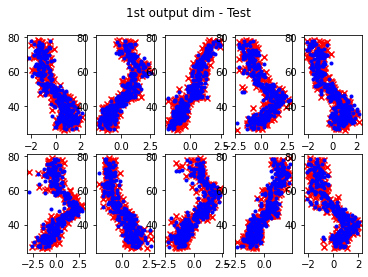

In [13]:
cup_model1 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


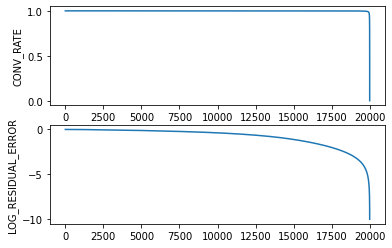

Fit time: 738.161910533905, #SV: 1220
SUM OF eps-LOSS: 6297.011383432809
DEVSET MEE: 1.7832342670092647


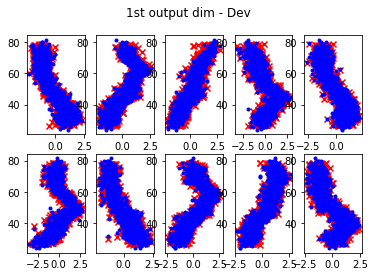

Testing the model
SUM OF eps-LOSS: 2114.1603097214775
TEST MEE: 2.095507124294902


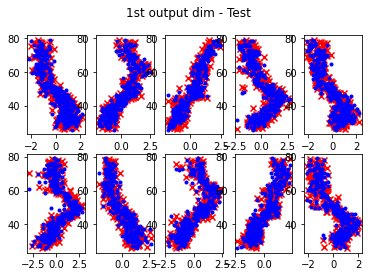

In [14]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [15]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

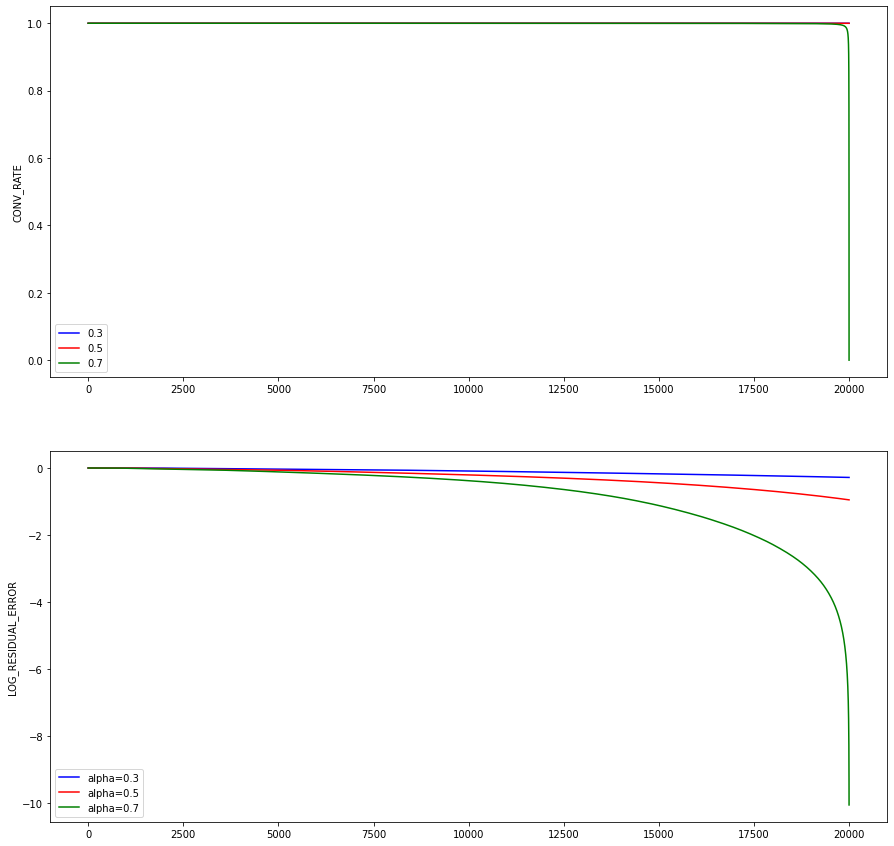

In [16]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

poly_01_0, poly_01_1, poly_01_2 = cup_model, cup_model1, cup_model2

In [17]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-4602.195024761917, -11515.529149414904, -18767.889586633588)

## RBF

Training first model ... 


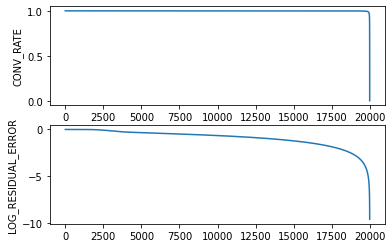

Fit time: 704.4584183692932, #SV: 1213
SUM OF eps-LOSS: 6476.179288889768
DEVSET MEE: 1.839147994898938


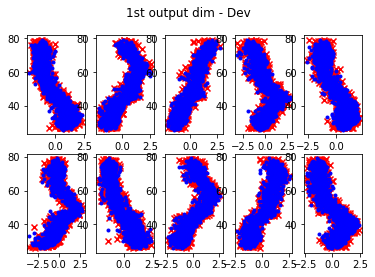

Testing the model
SUM OF eps-LOSS: 1906.212898875729
TEST MEE: 1.9520325983810223


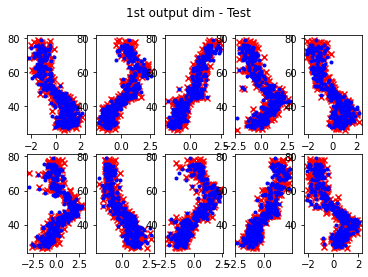

In [18]:
cup_model = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


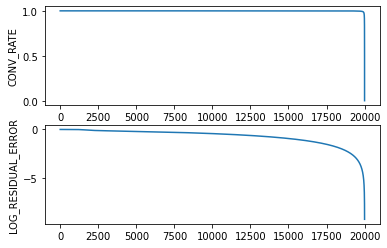

Fit time: 719.5218558311462, #SV: 1219
SUM OF eps-LOSS: 5363.482968052527
DEVSET MEE: 1.677715730606674


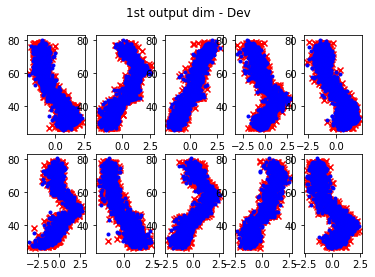

Testing the model
SUM OF eps-LOSS: 1725.5061124613308
TEST MEE: 1.8605994362722347


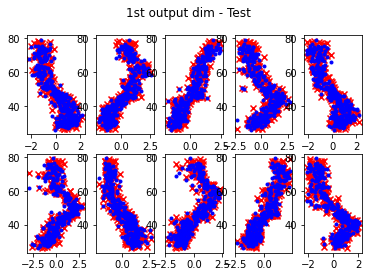

In [19]:
cup_model1 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


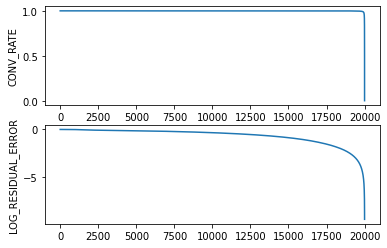

Fit time: 688.2080056667328, #SV: 1220
SUM OF eps-LOSS: 4708.567912960673
DEVSET MEE: 1.5604481979020046


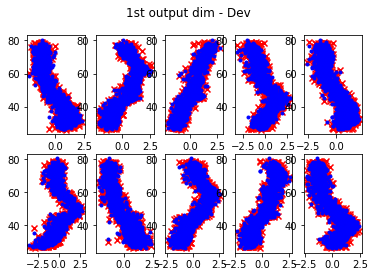

Testing the model
SUM OF eps-LOSS: 1654.6500298170258
TEST MEE: 1.798639538049484


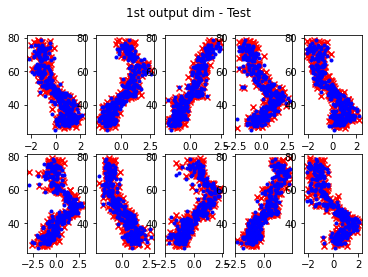

In [20]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [21]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

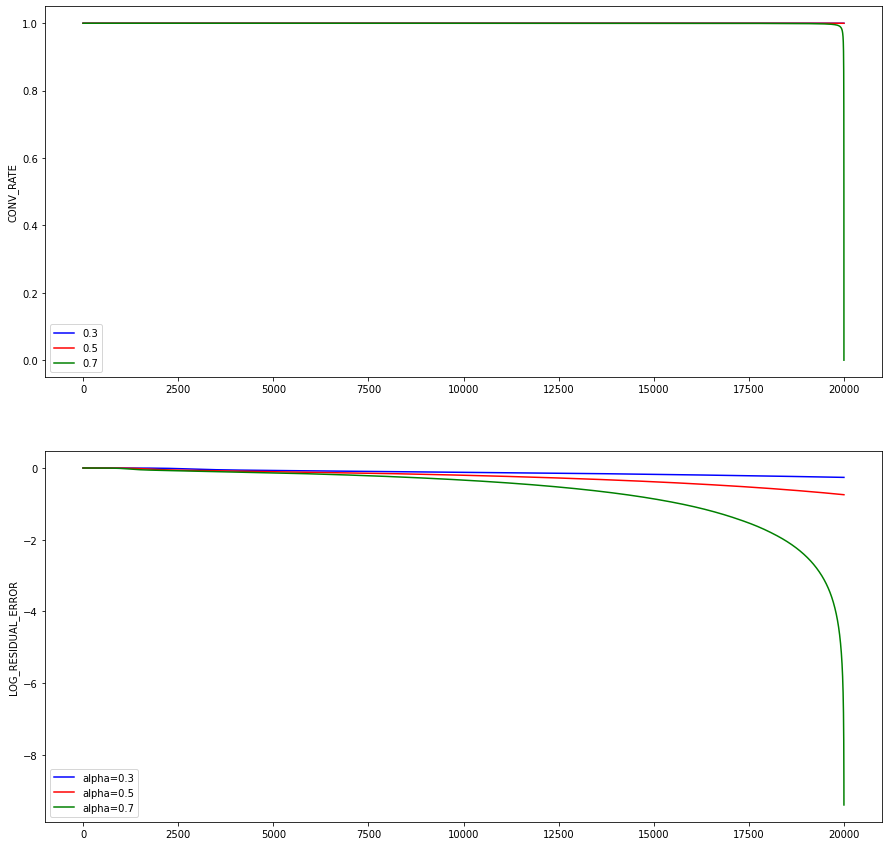

In [22]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

rbf_01_0, rbf_01_1, rbf_01_2 = cup_model, cup_model1, cup_model2

In [23]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-2786.517957417679, -6362.972769143631, -12116.438147948518)

In [24]:
with open("20k_01", "wb") as f:
    pickle.dump({"lin1": lin_01_0, "lin2": lin_01_1, "lin3": lin_01_2, "poly1": poly_01_0, "poly2": poly_01_1, "poly3": poly_01_2, "rbf1": rbf_01_0, "rbf2": rbf_01_1, "rbf3": rbf_01_2}, f, protocol=pickle.HIGHEST_PROTOCOL)
del lin_01_0, lin_01_1, lin_01_2, poly_01_0, poly_01_1, poly_01_2, rbf_01_0, rbf_01_1, rbf_01_2

# EPS = 1e-2

In [25]:
eps=1e-2

## LINEAR

Training first model ... 


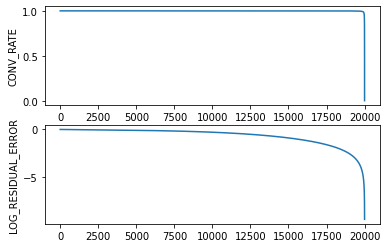

Fit time: 699.371860742569, #SV: 1201
SUM OF eps-LOSS: 88239.07235602925
DEVSET MEE: 6.608997411151248


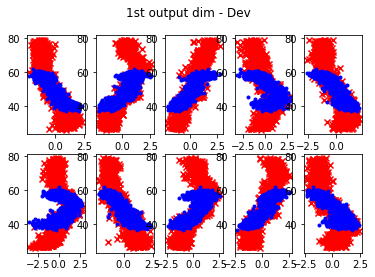

Testing the model
SUM OF eps-LOSS: 20998.571342424075
TEST MEE: 6.424432080700996


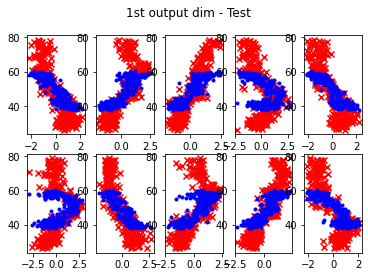

In [26]:
cup_model = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


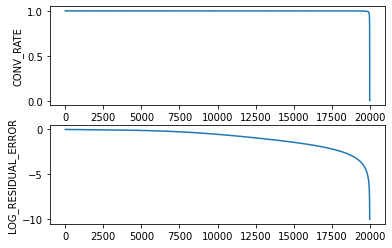

Fit time: 677.1196768283844, #SV: 1199
SUM OF eps-LOSS: 34052.38749302548
DEVSET MEE: 4.294968288950702


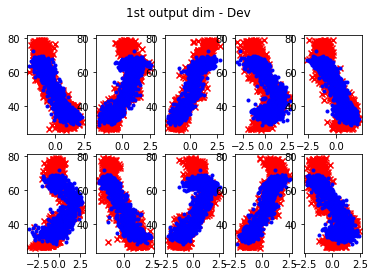

Testing the model
SUM OF eps-LOSS: 8679.917063115208
TEST MEE: 4.458542579582224


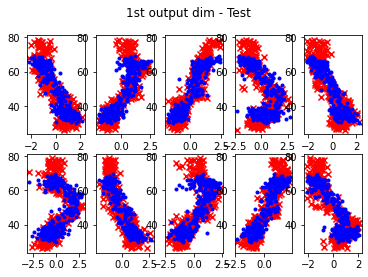

In [27]:
cup_model1 = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


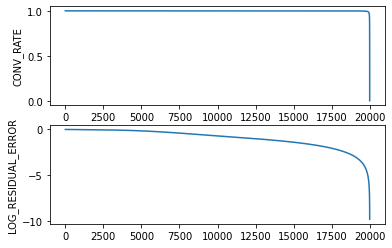

Fit time: 636.1725089550018, #SV: 1191
SUM OF eps-LOSS: 29456.21337741343
DEVSET MEE: 4.067396814624068


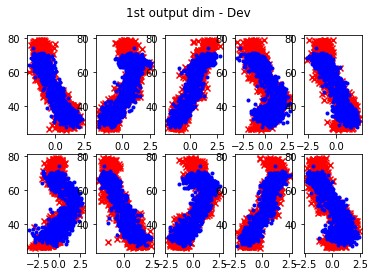

Testing the model
SUM OF eps-LOSS: 7684.372122076849
TEST MEE: 4.269389899750704


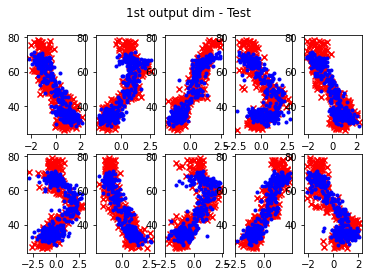

In [28]:
cup_model2 = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [29]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

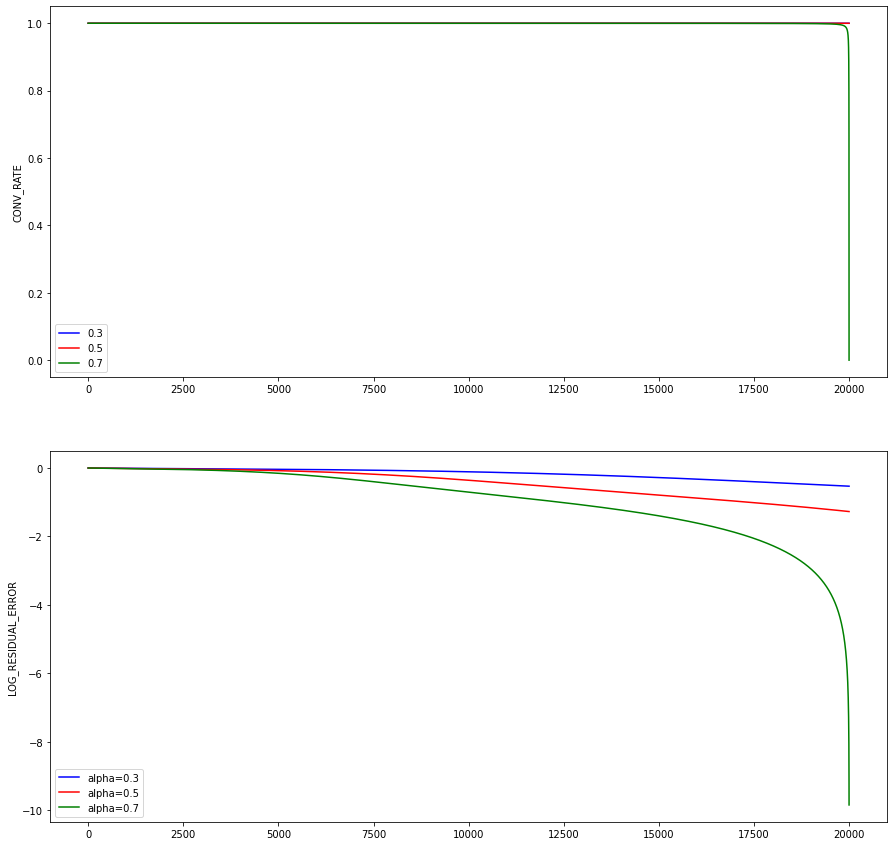

In [30]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

lin_01_0, lin_01_1, lin_01_2 = cup_model, cup_model1, cup_model2

In [31]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-13.718575273099322, -23.96502721970961, -33.29399930723032)

## POLY

Training first model ... 


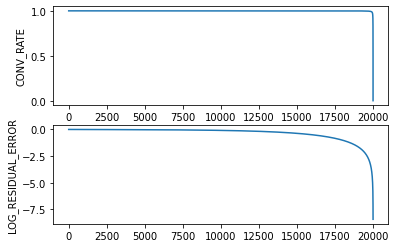

Fit time: 656.5302307605743, #SV: 1215
SUM OF eps-LOSS: 220918.85070132895
DEVSET MEE: 11.646036905994675


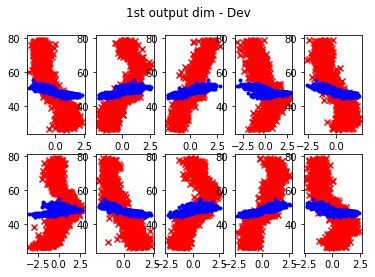

Testing the model
SUM OF eps-LOSS: 52175.88658814359
TEST MEE: 11.186248520493733


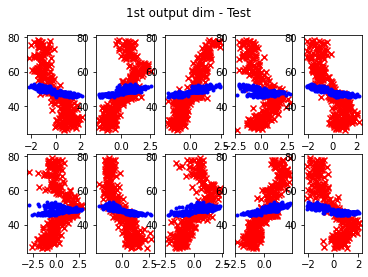

In [32]:
cup_model = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


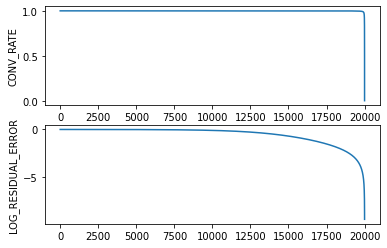

Fit time: 639.7743692398071, #SV: 1218
SUM OF eps-LOSS: 41417.85892054394
DEVSET MEE: 4.377347718101649


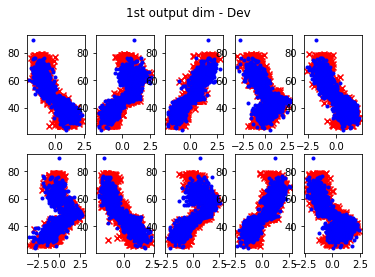

Testing the model
SUM OF eps-LOSS: 9831.320296247357
TEST MEE: 4.183156184039082


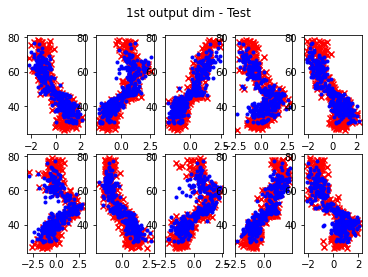

In [33]:
cup_model1 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


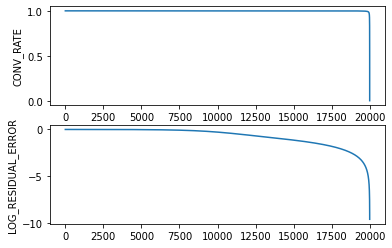

Fit time: 583.9606845378876, #SV: 1220
SUM OF eps-LOSS: 26751.545504075253
DEVSET MEE: 3.42897710894955


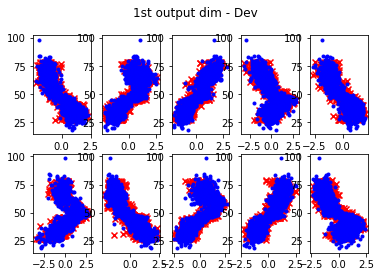

Testing the model
SUM OF eps-LOSS: 6245.891687203153
TEST MEE: 3.446200953263646


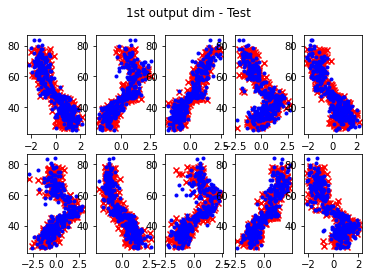

In [34]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [35]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

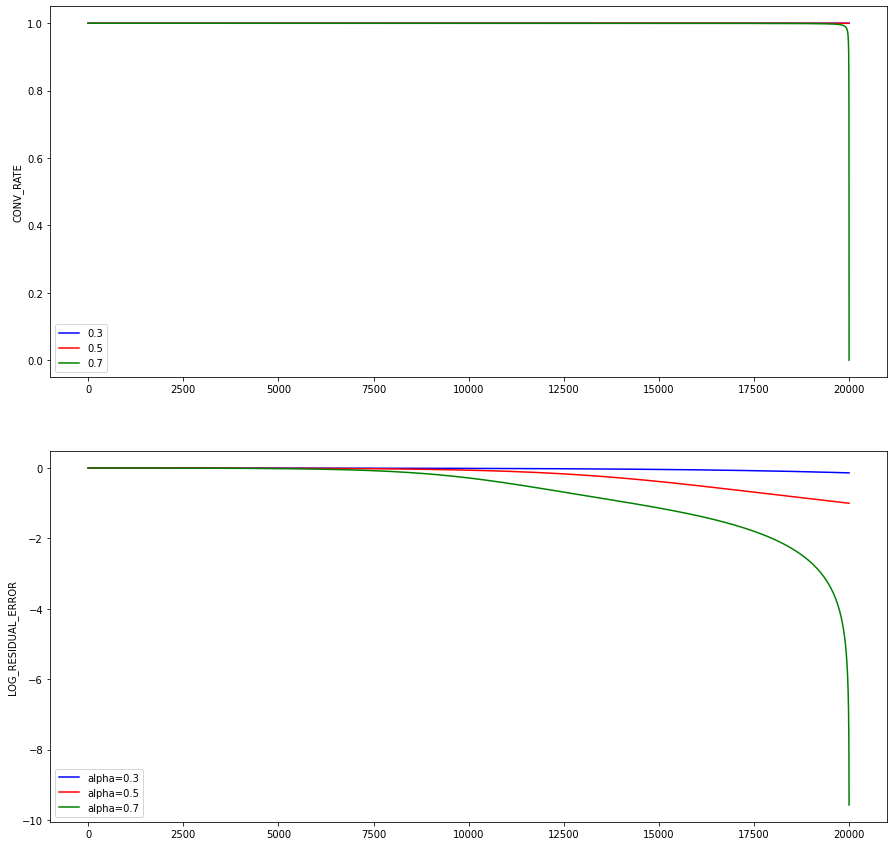

In [36]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

poly_01_0, poly_01_1, poly_01_2 = cup_model, cup_model1, cup_model2

In [37]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-62.99003155079825, -308.7982067789583, -488.0803472505431)

## RBF

Training first model ... 


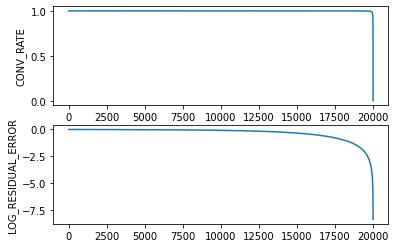

Fit time: 583.3314373493195, #SV: 1219
SUM OF eps-LOSS: 248837.09145845816
DEVSET MEE: 12.347465708686844


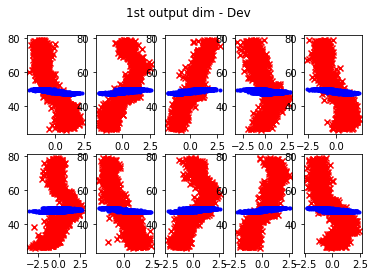

Testing the model
SUM OF eps-LOSS: 58804.91173852247
TEST MEE: 11.874205302681984


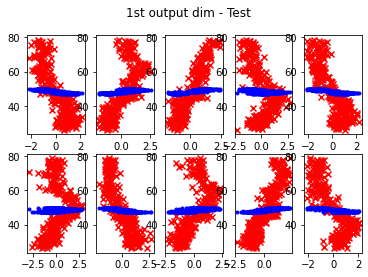

In [38]:
cup_model = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


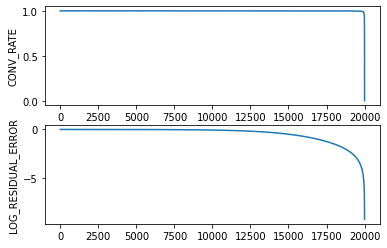

Fit time: 567.9532005786896, #SV: 1219
SUM OF eps-LOSS: 58004.586756924844
DEVSET MEE: 5.2652376223162936


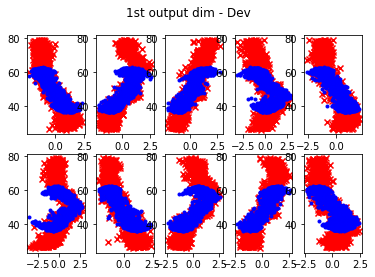

Testing the model
SUM OF eps-LOSS: 13861.051685415752
TEST MEE: 5.1246981152630084


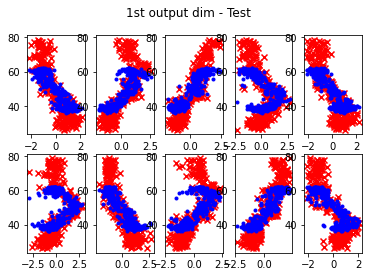

In [39]:
cup_model1 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


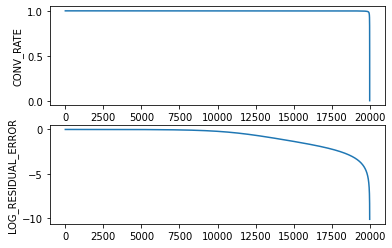

Fit time: 618.4055635929108, #SV: 1220
SUM OF eps-LOSS: 16863.94731964084
DEVSET MEE: 2.862026278895879


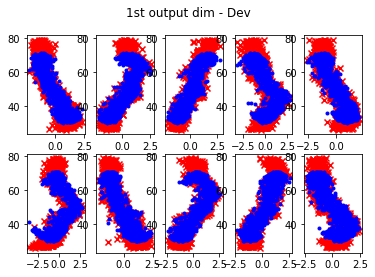

Testing the model
SUM OF eps-LOSS: 3891.504876847203
TEST MEE: 2.7579802470092387


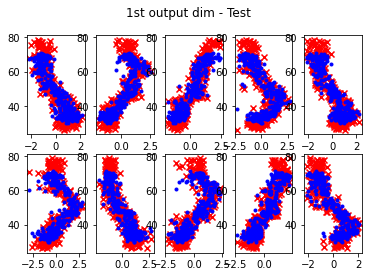

In [40]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [41]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

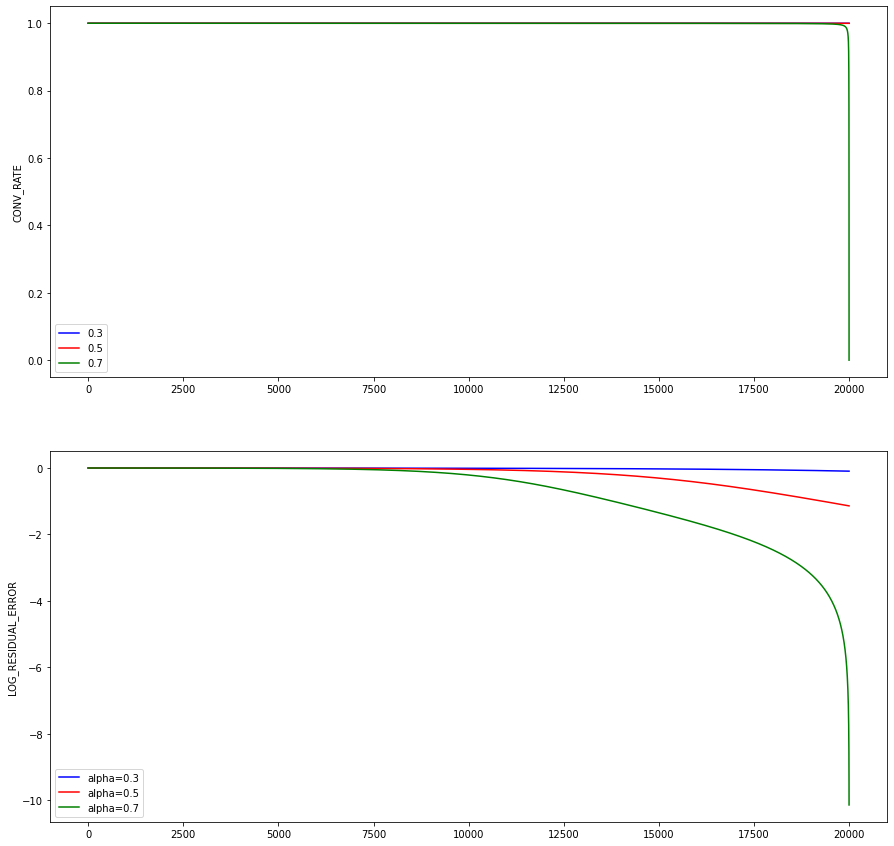

In [42]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

rbf_01_0, rbf_01_1, rbf_01_2 = cup_model, cup_model1, cup_model2

In [43]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-69.29460046713905, -521.531468920489, -766.8852248960657)

In [44]:
with open("20k_02", "wb") as f:
    pickle.dump({"lin1": lin_01_0, "lin2": lin_01_1, "lin3": lin_01_2, "poly1": poly_01_0, "poly2": poly_01_1, "poly3": poly_01_2, "rbf1": rbf_01_0, "rbf2": rbf_01_1, "rbf3": rbf_01_2}, f, protocol=pickle.HIGHEST_PROTOCOL)
del lin_01_0, lin_01_1, lin_01_2, poly_01_0, poly_01_1, poly_01_2, rbf_01_0, rbf_01_1, rbf_01_2

# EPS = 5e-3

In [6]:
eps=5e-3

## LINEAR

Training first model ... 


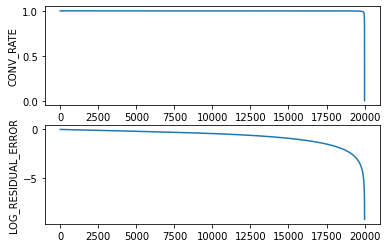

Fit time: 648.7566046714783, #SV: 1184
SUM OF eps-LOSS: 228115.4033903135
DEVSET MEE: 11.731131452868556


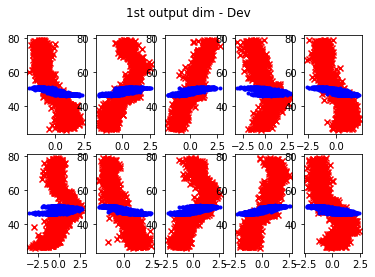

Testing the model
SUM OF eps-LOSS: 53830.71775353054
TEST MEE: 11.259624835974861


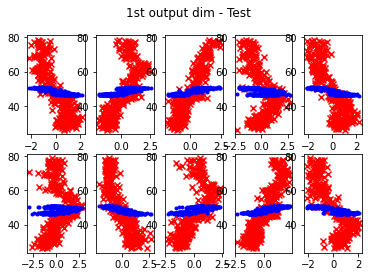

In [7]:
cup_model = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


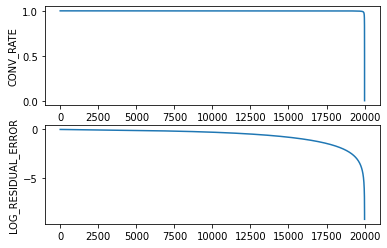

Fit time: 627.9127666950226, #SV: 1192
SUM OF eps-LOSS: 133477.21336157905
DEVSET MEE: 8.496692429944405


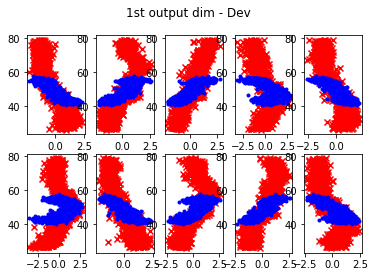

Testing the model
SUM OF eps-LOSS: 31556.11268755289
TEST MEE: 8.2209724153013


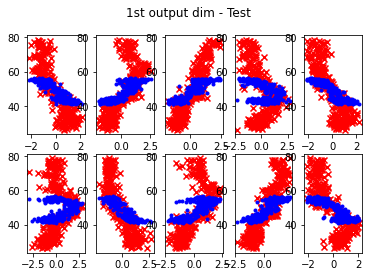

In [8]:
cup_model1 = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


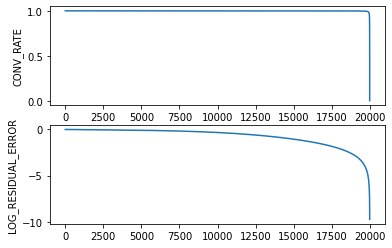

Fit time: 624.944534778595, #SV: 1205
SUM OF eps-LOSS: 59369.8301832427
DEVSET MEE: 5.352327603938677


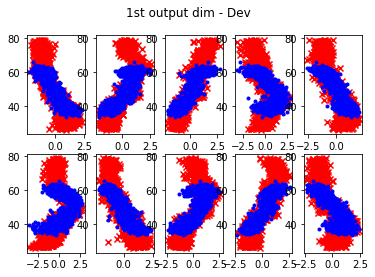

Testing the model
SUM OF eps-LOSS: 14334.034911220258
TEST MEE: 5.292545028347538


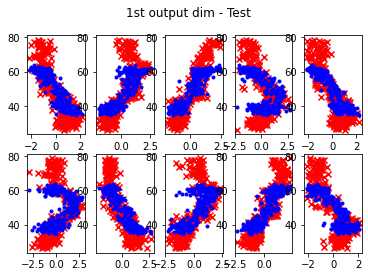

In [9]:
cup_model2 = SVR('linear', box=1)
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [10]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

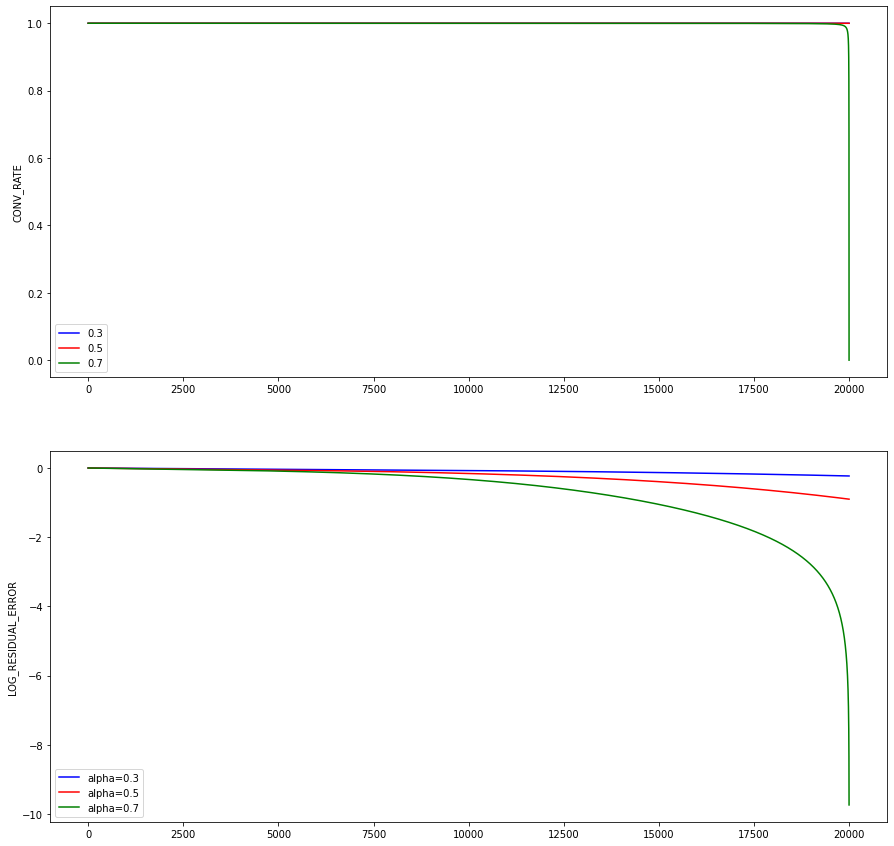

In [11]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

lin_01_0, lin_01_1, lin_01_2 = cup_model, cup_model1, cup_model2

In [12]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-3.4673697527822815, -10.007648992167525, -16.85397755992658)

## POLY

Training first model ... 


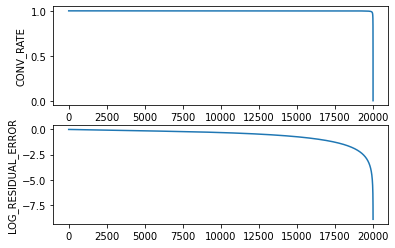

Fit time: 615.8868088722229, #SV: 1213
SUM OF eps-LOSS: 276935.4583525423
DEVSET MEE: 13.118227701014066


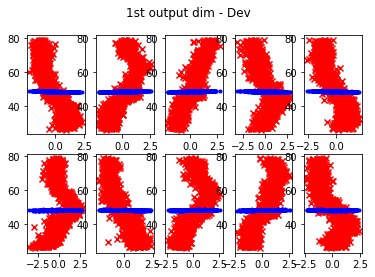

Testing the model
SUM OF eps-LOSS: 65372.66964134827
TEST MEE: 12.599747910289018


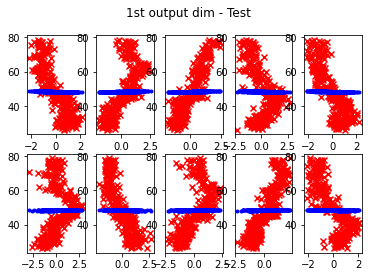

In [13]:
cup_model = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


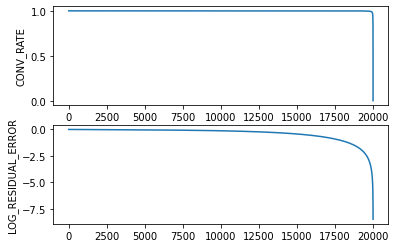

Fit time: 628.6912086009979, #SV: 1215
SUM OF eps-LOSS: 253563.5630275789
DEVSET MEE: 12.526878914997857


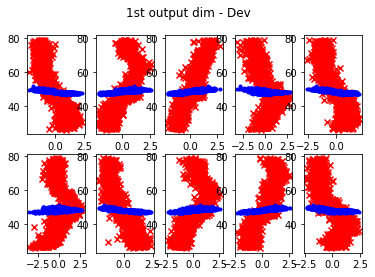

Testing the model
SUM OF eps-LOSS: 59866.71282212094
TEST MEE: 12.031958429548576


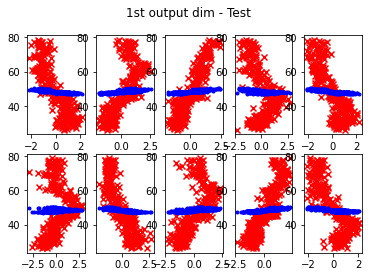

In [14]:
cup_model1 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


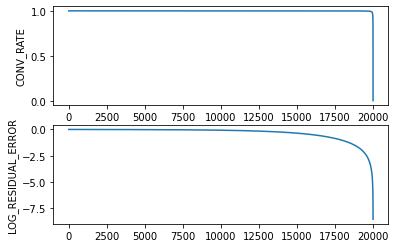

Fit time: 633.1062908172607, #SV: 1219
SUM OF eps-LOSS: 167911.05484499317
DEVSET MEE: 10.035687728882438


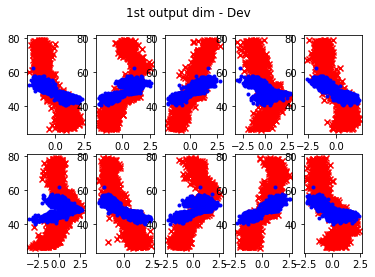

Testing the model
SUM OF eps-LOSS: 39686.56214153401
TEST MEE: 9.639683376789584


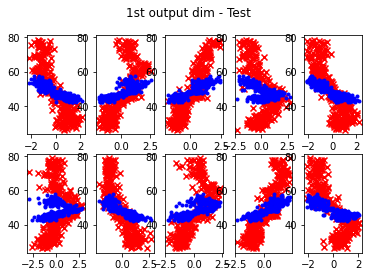

In [15]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [16]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

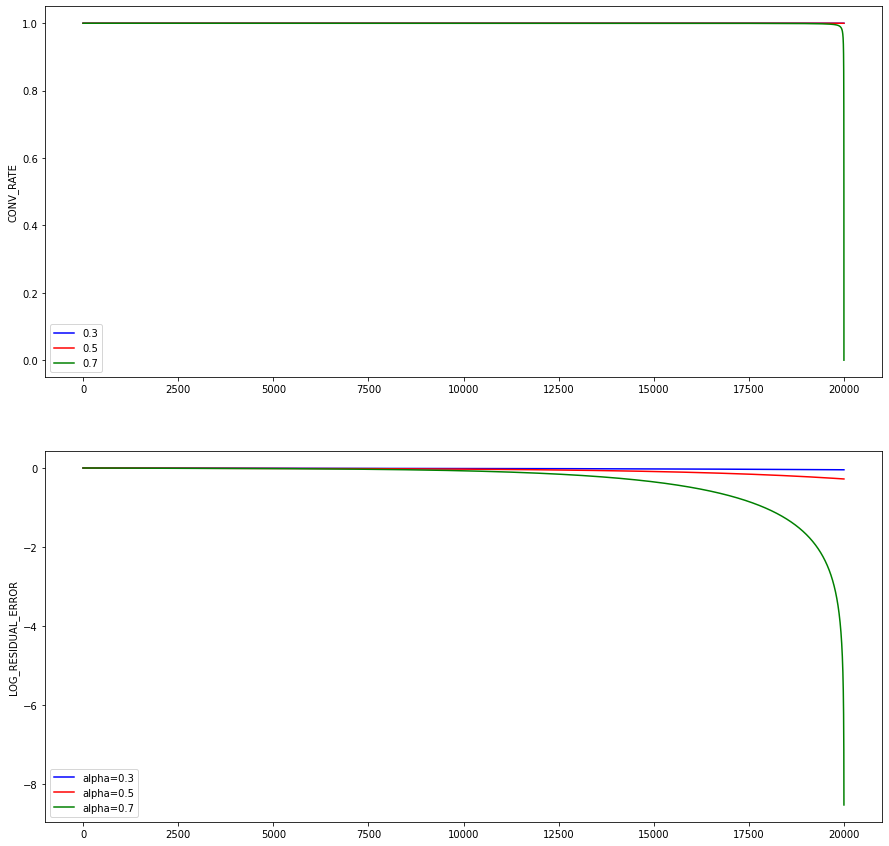

In [17]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

poly_01_0, poly_01_1, poly_01_2 = cup_model, cup_model1, cup_model2

In [18]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-5.276753164711035, -29.112200907719913, -120.12888682804797)

## RBF

Training first model ... 


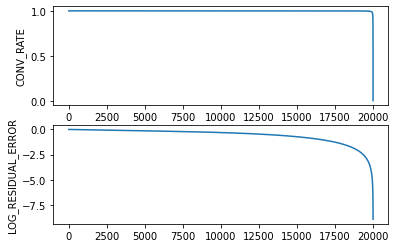

Fit time: 622.7872996330261, #SV: 1213
SUM OF eps-LOSS: 279576.489379643
DEVSET MEE: 13.178850283951366


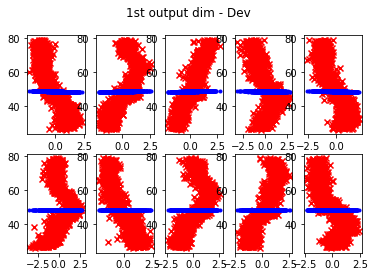

Testing the model
SUM OF eps-LOSS: 65999.0865256857
TEST MEE: 12.659080787593172


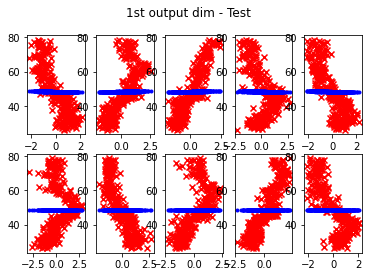

In [19]:
cup_model = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.3,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


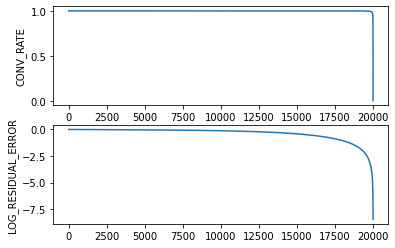

Fit time: 632.134434223175, #SV: 1214
SUM OF eps-LOSS: 267485.64755578083
DEVSET MEE: 12.857582362863148


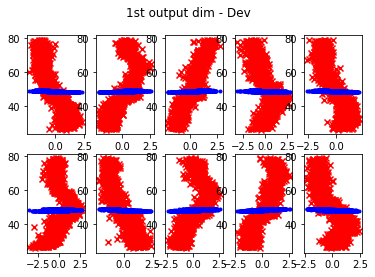

Testing the model
SUM OF eps-LOSS: 63170.138059151584
TEST MEE: 12.356242146580449


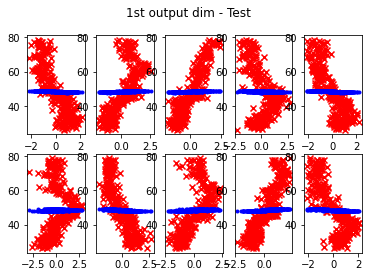

In [20]:
cup_model1 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.5,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model1.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


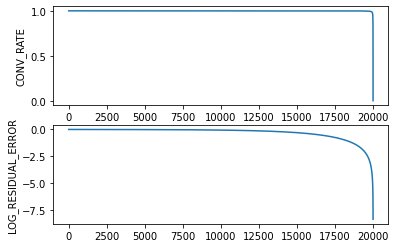

Fit time: 616.8773958683014, #SV: 1220
SUM OF eps-LOSS: 212792.322917763
DEVSET MEE: 11.300366373228321


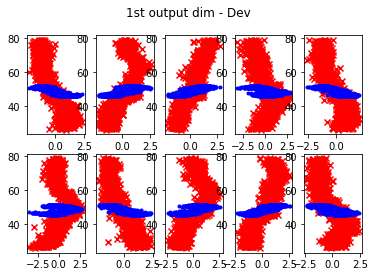

Testing the model
SUM OF eps-LOSS: 50360.62538890752
TEST MEE: 10.88551041256195


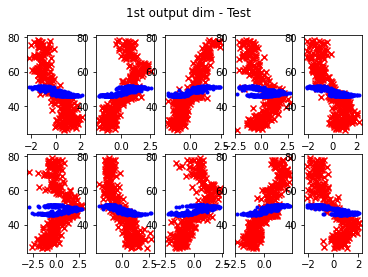

In [21]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
opt_argv = {
    'alpha': 0.7,
    'eps': eps,
    'vareps': 0.1,
    'maxiter': maxiter
}
cup_model2.fit(dev_set, dev_out1, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [22]:
# still needed ???
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

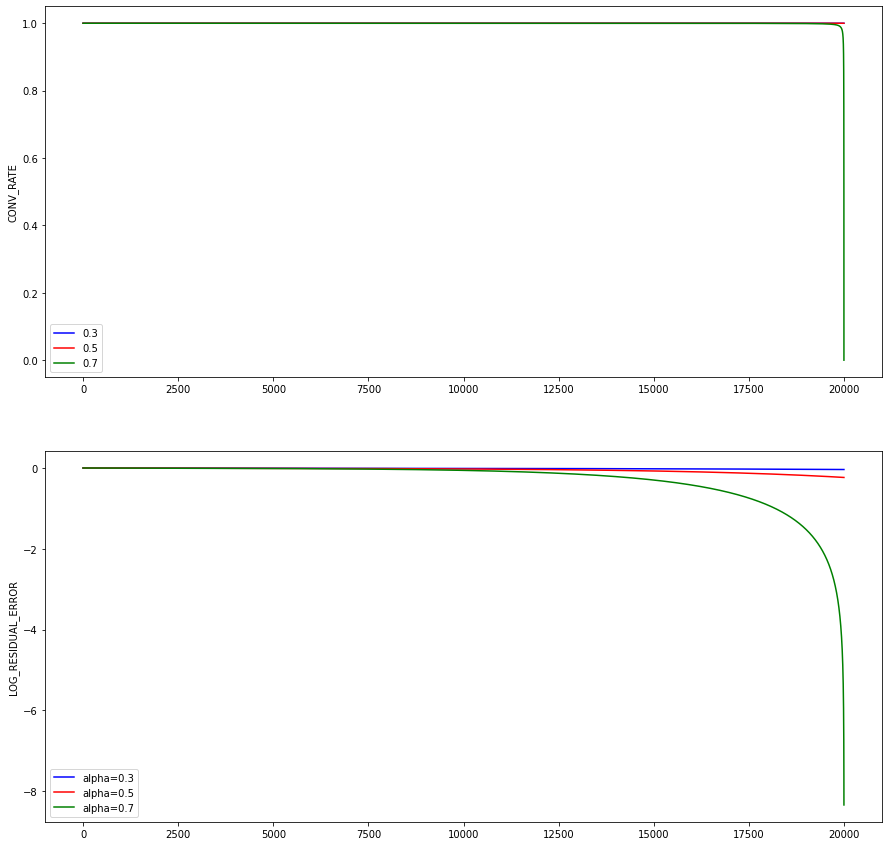

In [23]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.3', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.5', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='alpha=0.7', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['0.3','0.5', '0.7'])
plt.legend()
plt.show()

rbf_01_0, rbf_01_1, rbf_01_2 = cup_model, cup_model1, cup_model2

In [24]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar']

(-5.313364227196823, -30.370798463572854, -145.6790144456942)

In [25]:
with open("20k_03", "wb") as f:
    pickle.dump({"lin1": lin_01_0, "lin2": lin_01_1, "lin3": lin_01_2, "poly1": poly_01_0, "poly2": poly_01_1, "poly3": poly_01_2, "rbf1": rbf_01_0, "rbf2": rbf_01_1, "rbf3": rbf_01_2}, f, protocol=pickle.HIGHEST_PROTOCOL)
del lin_01_0, lin_01_1, lin_01_2, poly_01_0, poly_01_1, poly_01_2, rbf_01_0, rbf_01_1, rbf_01_2